# **Assignment1: Image Filtering and Gradient Operators**

### NetID: 
### Name: 

### **Introduction to Image Filtering**

Image filtering is a crucial operation in computer vision that involves manipulating or analyzing images using various filters. Filters can enhance an image, highlight certain features, or detect edges and patterns that might not be immediately visible. The process involves convolving a filter (or kernel) with an image, which helps in transforming the image in specific ways.

In this assignment, we’ll focus on **spatial filtering**, which involves modifying the pixel values in an image based on their spatial relationship with neighboring pixels. This is done using a mathematical operation called **convolution**, where a filter (also known as a kernel) is applied to an image to produce a new image.

### **Types of Filters**
- **Smoothing Filters**: These reduce noise and detail in an image. An example is the averaging or blur filter.
- **Gradient Filters**: These detect changes in intensity and are often used for edge detection. Popular gradient filters include the Sobel and Laplacian filters.

In computer vision, **gradients** are often used to detect edges, as edges correspond to regions in an image where intensity values change abruptly. By applying gradient filters, we can highlight these changes, which often reveal important structures in the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **Part 1 : Loading the Images in Grayscale**

For this task, you will load two images: `zebra.png` and `cameraman.png`, and convert them to grayscale. These images are provided as part of the assignment, and you'll use them to perform the filtering tasks.

The images can be loaded using OpenCV (`cv2`). When loading the images, we'll specify a flag to load them directly in grayscale.

> **Note**: We use grayscale images for simplicity in this assignment. Working with grayscale means dealing with only one channel (intensity), whereas RGB images have three channels (red, green, blue), making the convolution process more complex.

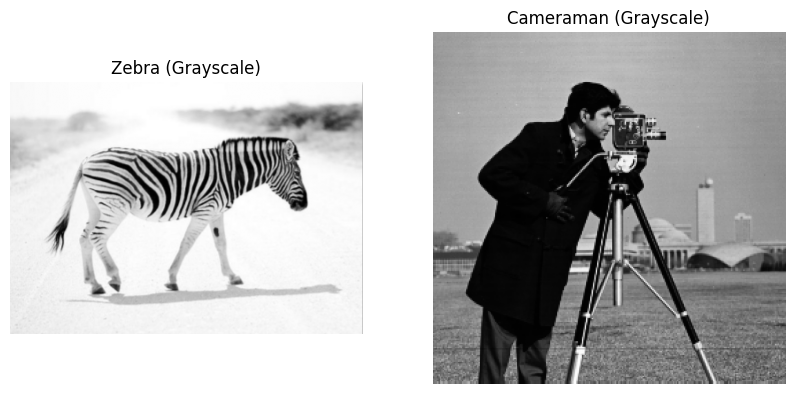

In [3]:
# Load the images in grayscale
zebra_image = cv2.imread('Part1_Images/zebra.png', cv2.IMREAD_GRAYSCALE)
cameraman_image = cv2.imread('Part1_Images/cameraman.png', cv2.IMREAD_GRAYSCALE)

# Display the images
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Zebra (Grayscale)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Cameraman (Grayscale)")
plt.axis("off")

plt.show()

## **Part 2: Padding Methods**

### **Introduction to Padding**

When applying convolution to images, especially at the edges or boundaries, there is a need to define how to handle the pixels outside the image. This is where padding comes in. Padding helps us artificially expand the image to avoid losing information at the borders.

Two common padding techniques are:

1. **Zero Padding**: This technique adds a border of zeros around the image. It’s simple and often used when the boundaries of the image don’t carry much information.
   
   - **Example**: Consider a small 3x3 image:
     ```
     [ 1  2  3 ]
     [ 4  5  6 ]
     [ 7  8  9 ]
     ```
     If we apply 1-pixel zero padding, the image becomes:
     ```
     [ 0  0  0  0  0 ]
     [ 0  1  2  3  0 ]
     [ 0  4  5  6  0 ]
     [ 0  7  8  9  0 ]
     [ 0  0  0  0  0 ]
     ```
     Here, a border of zeros is added around the original image.

2. **Symmetric Padding**: In this technique, the padding replicates the values from the image borders. The pixels outside the image are a mirror reflection of the pixels on the edge.

   - **Example**: Using the same 3x3 image:
     ```
     [ 1  2  3 ]
     [ 4  5  6 ]
     [ 7  8  9 ]
     ```
     If we apply 1-pixel symmetric padding, the image becomes:
     ```
     [ 5  4  5  6  5 ]
     [ 2  1  2  3  2 ]
     [ 5  4  5  6  5 ]
     [ 8  7  8  9  8 ]
     [ 5  4  5  6  5 ]
     ```
     Here, the values at the borders are reflected from the original image, creating symmetry.

---

### **Your Task**

1. **Zero Padding**: Implement a function that takes an image and a padding size `p`, and returns the image padded with zeros. You must implement this manually without using any library functions like `np.pad`.

2. **Symmetric Padding**: Implement another function that applies symmetric padding to the image, again without using any library functions like `np.pad`.

In [25]:
def zero_padding(image, p):
    """
    Add zero padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Zero-padded image
    """
    # TODO: Implement zero padding
    (h,w) = image.shape
    grid = np.zeros((h + 2 * p, w + 2 * p))
    
    # Adding image given specific slice
    grid[p:h+p,p:w+p] = image
    
    return grid
    

def symmetric_padding(image, p):
    """
    Add symmetric padding to the image.
    :param image: 2D NumPy array (grayscale image)
    :param p: Number of pixels to pad on each side
    :return: Symmetrically padded image
    """
    # TODO: Implement symmetric padding
    h,w = image.shape
    grid = np.zeros((h+2 * p, w + 2*p))
    
    for i in range(h + 2*p):
        for j in range(w + 2*p):
            # Calculate i original location
            if i < p:
                img_i = p-i
            elif i >= h + p:
                img_i = 2 *h + p -2 - i 
            else:
                img_i = i-p
            
            # calculating j location
            if j < p:
                img_j = p - j
            elif j >= w + p:
                img_j = 2 * w + p -2 - j
            else:
                img_j = j - p
            
            grid[i,j] = image[img_i,img_j]
            
    return grid
    
    
    


In [26]:
image_2d = np.array(([2,2],[2,2]))
print(image_2d)
print(image_2d.shape)
padded_im_2d = zero_padding(image_2d,1)

print(padded_im_2d.shape)

[[2 2]
 [2 2]]
(2, 2)
(4, 4)


In [27]:
image = np.array(([1,2,3],
                  [4,5,6],
                  [7,8,9]))

print(image)
print(image.shape)
sym_padded_image = symmetric_padding(image,1)
print(sym_padded_image)
print(sym_padded_image.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
[[5. 4. 5. 6. 5.]
 [2. 1. 2. 3. 2.]
 [5. 4. 5. 6. 5.]
 [8. 7. 8. 9. 8.]
 [5. 4. 5. 6. 5.]]
(5, 5)



Now that you have implemented the zero padding and symmetric padding functions, it's time to experiment with different padding sizes.

### **Task:**
1. Use the functions you implemented to apply **zero padding** and **symmetric padding** to the images `zebra.png` and `cameraman.png`.
2. This time, use padding sizes of `p = 3` and `p = 5` and visualize the results.
3. Display the padded images side by side for easy comparison.

 Original zebra image shape: (286, 399)

Zebra image with padding p=3: (292, 405)

Zebra image with padding p=5: (296, 409)
 Original cameraman image shape: (256, 256)

cameraman image with padding p=3: (262, 262)

cameraman image with padding p=5: (266, 266)


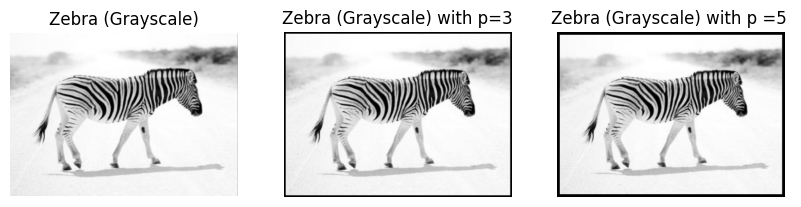

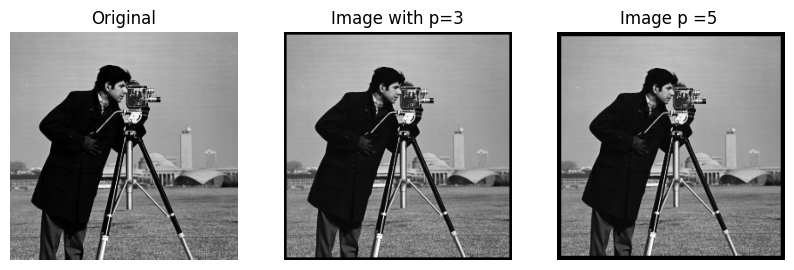

In [39]:
# Zebra Zero Padding
zebra_zero_padding_3 = zero_padding(zebra_image, p=3)
zebra_zero_padding_5 = zero_padding(zebra_image, p=5)

print(f" Original zebra image shape: {zebra_image.shape}\n")
print(f"Zebra image with padding p=3: {zebra_zero_padding_3.shape}\n")
print(f"Zebra image with padding p=5: {zebra_zero_padding_5.shape}")

# Cameraman zero padding

cameraman_zero_padding_3 = zero_padding(cameraman_image, p=3)
cameraman_zero_padding_5 = zero_padding(cameraman_image, p=5)

print(f" Original cameraman image shape: {cameraman_image.shape}\n")
print(f"cameraman image with padding p=3: {cameraman_zero_padding_3.shape}\n")
print(f"cameraman image with padding p=5: {cameraman_zero_padding_5.shape}")



# Display the images
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Zebra (Grayscale)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_zero_padding_3, cmap='gray')
plt.title("Zebra (Grayscale) with p=3")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_zero_padding_5, cmap='gray')
plt.title("Zebra (Grayscale) with p =5 ")
plt.axis("off")

plt.show()



# Display Cameraman images
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_zero_padding_3, cmap='gray')
plt.title("Image with p=3")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_zero_padding_5, cmap='gray')
plt.title("Image p =5 ")
plt.axis("off")

plt.show()


 Original zebra image shape: (286, 399)

Zebra image with sym padding p=3: (292, 405)

Zebra image with sym padding p=5: (296, 409)

---------------------
Cameraman Image Shapes
 Original cameraman image shape: (256, 256)

cameraman image with sym padding p=3: (262, 262)

cameraman image with sym padding p=5: (266, 266)


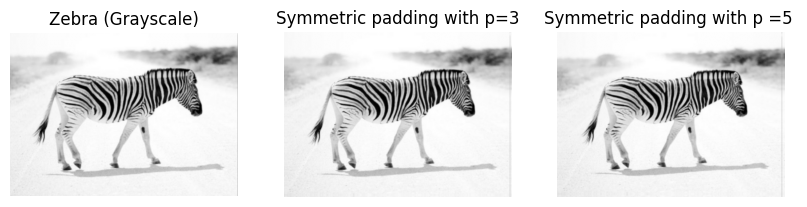

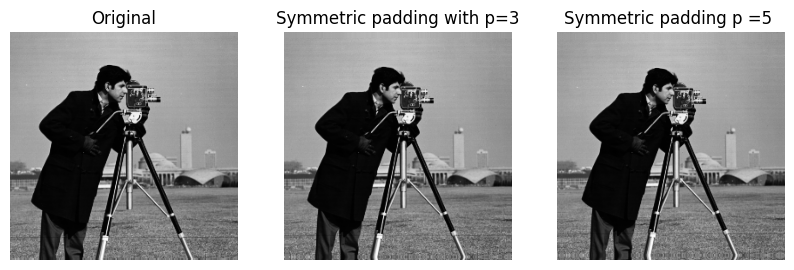

In [42]:
# Zebra Symmetric Padding
zebra_sym_padding_3 = symmetric_padding(zebra_image, p=3)
zebra_sym_padding_5 = symmetric_padding(zebra_image, p=5)

print(f" Original zebra image shape: {zebra_image.shape}\n")
print(f"Zebra image with sym padding p=3: {zebra_sym_padding_3.shape}\n")
print(f"Zebra image with sym padding p=5: {zebra_sym_padding_5.shape}\n")

print("---------------------")

# Cameraman zero padding
cameraman_sym_padding_3 = symmetric_padding(cameraman_image, p=3)
cameraman_sym_padding_5 = symmetric_padding(cameraman_image, p=5)

print("Cameraman Image Shapes")
print(f" Original cameraman image shape: {cameraman_image.shape}\n")
print(f"cameraman image with sym padding p=3: {cameraman_sym_padding_3.shape}\n")
print(f"cameraman image with sym padding p=5: {cameraman_sym_padding_5.shape}")



# Display the images
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(zebra_image, cmap='gray')
plt.title("Zebra (Grayscale)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zebra_sym_padding_3, cmap='gray')
plt.title("Symmetric padding with p=3")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zebra_sym_padding_5, cmap='gray')
plt.title("Symmetric padding with p =5 ")
plt.axis("off")

plt.show()



# Display Cameraman images
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(cameraman_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cameraman_sym_padding_3, cmap='gray')
plt.title("Symmetric padding with p=3")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cameraman_sym_padding_5, cmap='gray')
plt.title("Symmetric padding p =5 ")
plt.axis("off")

plt.show()



### **Questions to Answer (try to answer in 1-2 lines):**
- What differences do you observe when comparing zero padding and symmetric padding with larger `p` values?
- How does the appearance of the padded borders affect the overall visual structure of the images?

Answer: 
Zero paddings creates this black edge, while symmetric padding blends more natural with the image -- given the structure of obtaining pixel values of the same image. 
Zero padding creates this border effect that could help for edge detection while symmetric padding generates this natural sturcutre of the image.

## **Part 3: Implementing the Convolution Operator**

### **Introduction to Convolution**

The convolution operator is one of the core building blocks in image processing. Essentially, convolution applies a filter (or kernel) to an image to produce a transformed version of that image. This is achieved by sliding the kernel over the image and computing a weighted sum at each position.

A 2D convolution between an image `I` and a kernel `K` is defined as:


$$I'(x, y) = \sum_{m=-k}^{k} \sum_{n=-k}^{k} I(x+m, y+n) \cdot K(m, n)$$

Where:
- `I'(x, y)` is the output image at location `(x, y)`
- `I(x+m, y+n)` are the pixels of the input image
- `K(m, n)` are the corresponding kernel values
- `k` is the half-size of the kernel

### **Your Task:**
You need to implement the convolution operator **from scratch**. You will:
1. Take an image and a kernel as input.
2. Apply **convolution** by sliding the kernel over the image.
3. Return the resulting filtered image.

You must **not** use any helper functions such as `scipy.signal.convolve2d` or `np.convolve()`. Instead, manually implement the convolution process.

### **Separable Filters:**
For this assignment, note that all filters you will use can be treated as separable filters. This means you can choose to implement the convolution either using a 1D filter applied in two passes (horizontal and vertical) or directly as a 2D filter. This can simplify your implementation!

---

### **Steps for Convolution Implementation:**
1. **Padding**: Before applying convolution, you'll need to pad the input image appropriately (use your own padding functions from earlier).
2. **Sliding the Kernel**: Slide the kernel over the image and compute the sum of element-wise multiplications at each position.
3. **Storing the Result**: Store the results in a new output image.

In [ ]:
def convolve(image, kernel):
    """
    Apply 1D/2D convolution between the input image and the kernel.
    :param image: 2D NumPy array (grayscale image)
    :param kernel: 1D/2D NumPy array (convolution kernel)
    :return: Convolved image
    """
    # TODO: Implement convolution
    pass

### **Sanity Check with a Box Filter**

### **Introduction to the Box Filter**

A **box filter** is one of the simplest types of filters in image processing. It computes the average of the pixel values in a neighborhood around each pixel. A 3x3 box filter looks like this:


$$K_{\text{box}} = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$


This kernel averages the values of each 3x3 region in the image, resulting in a blurring effect.

### **Separable Box Filter:**
The box filter is separable, meaning it can be broken down into two 1D filters. For a 3x3 box filter, it can be represented as the following two 1D filters:

$$
K_{\text{horizontal}} = \frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}, \quad
K_{\text{vertical}} = \frac{1}{3} \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

Using these 1D filters allows you to apply the convolution in two passes: first horizontally and then vertically, which can be more efficient.

### **Task:**
1. Implement the box filter manually as a 3x3 kernel.
2. Apply your `convolve` function using this box filter on both the `zebra.png` and `cameraman.png` images.
3. Visualize the results and check if the images appear blurred, which indicates that the convolution is working correctly.


In [ ]:
#Check for box filter

## **Part 4: Implementing a Gaussian Filter**

### **Introduction to the Gaussian Filter**

The **Gaussian filter** is used for blurring and smoothing images. It weighs pixels based on their distance from the center of the kernel, which results in a more natural blurring effect compared to the box filter. The Gaussian function with mean zero and standard deviation $\sigma$ is defined as:

$$
G(x, y) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Where:
- $\sigma $ is the standard deviation, controlling the extent of the blur.
- $(x, y)$ are the coordinates of the pixel relative to the center of the kernel.

### **Task:**
1. Implement a function to create a Gaussian kernel of size $k \times k$ given a standard deviation $\sigma$.
2. Use your convolution function to apply this Gaussian filter to both the `zebra.png` and `cameraman.png` images.
3. Visualize the results to observe the smoothing effect.

### **Steps to Create the Gaussian Kernel:**
1. Generate a 2D grid of coordinates centered at the origin.
2. Apply the Gaussian function to each point in the grid.
3. Normalize the kernel so that the sum of all its values equals 1.

### **Note on Separable Gaussian Filter**

The Gaussian filter is a **separable filter**, which means that you can implement it as two successive 1D filters instead of a single 2D filter. This can be more efficient in terms of computation.

1. **1D Implementation**: You can create a 1D Gaussian kernel and apply it twice—first in the horizontal direction, then in the vertical direction.
   
2. **2D Implementation**: Alternatively, you may directly implement the full 2D Gaussian kernel as described in the previous section.

Feel free to choose either approach based on your preference and understanding!

### **Hint:**
Start with a kernel size of 3x3 and a reasonable $\sigma$ value (e.g., $\sigma = 1.0$).

In [ ]:
def gaussian_kernel(size, sigma):
    """
    Create a Gaussian kernel.
    :param size: Size of the kernel (must be odd)
    :param sigma: Standard deviation for the Gaussian
    :return: Gaussian kernel (1D/2D NumPy array)
    """
    # TODO: Implement Gaussian kernel generation
    pass

## **Comparing Results with Different Sigma Values**

Now that you have implemented the Gaussian filter, it's time to see how different values of $\sigma$ affect the output.

### **Task:**
1. Apply the Gaussian filter to both the `zebra.png` and `cameraman.png` images using the following $\sigma$ values: **1, 2, 5,** and **10**.
2. Use both **zero padding** and **symmetric padding** for each $\sigma$ value.
3. Visualize the results for each combination of $\sigma$ and padding type.

In [ ]:
# Check for Gaussian filter


### **Questions to Answer (Use 1-2 lines to answer):**
- How does increasing $\sigma$ affect the blurring of the images?
- What differences do you notice between the results obtained using zero padding versus symmetric padding?
- Which padding method preserves the image structure better when using larger \$\sigma$ values?

## **Part 5: Median Filters**

### **Introduction to Median Filters**

The **median filter** is a non-linear filtering technique commonly used for noise reduction, particularly effective at removing salt-and-pepper noise while preserving edges. Unlike linear filters (such as Gaussian or box filters), the median filter replaces each pixel with the median value of pixels in its neighborhood.

For a pixel at position $(x, y)$, the median filter computes:

$$
I'(x, y) = \text{median}\{I(x+m, y+n) : (m, n) \in \text{neighborhood}\}
$$

Where the neighborhood is typically a square region of size $k \times k$ centered at $(x, y)$.

### **Advantages of Median Filters:**
- **Noise Reduction**: Particularly effective for salt-and-pepper noise.
- **Edge Preservation**: Unlike Gaussian filters, median filters preserve sharp edges better.
- **Non-linear**: Does not assume linearity, making it more robust for certain types of noise.

### **Task:**
1. Implement a `median_filter` function that applies median filtering to an image using a kernel of size $k \times k$.
2. Apply the median filter to `cameraman_median.png` images using kernel sizes of **3x3**, **5x5**, and **7x7**.
3. Use the padding method of your choice (zero or symmetric padding) to handle boundaries.
4. Visualize the results and compare the effects of different kernel sizes.
5. Compare the median filter results with the Gaussian filter results on the same images.

### **Implementation Notes:**
- You must implement the median filter manually without using built-in functions like `scipy.ndimage.median_filter`.
- Consider the computational efficiency of your implementation.
- Ensure proper handling of image boundaries using your padding functions.

In [ ]:
# Imeplement Median filter
def median_filter(image, kernel_size):
    """
    Apply median filtering to the input image.
    :param image: 2D NumPy array (grayscale image)
    :param kernel_size: Size of the median filter kernel (must be odd)
    :return: Median filtered image
    """
    # TODO: Implement median filtering
    pass


In [ ]:
cameraman_median_image = cv2.imread('<INSERT PATH HERE>', cv2.IMREAD_GRAYSCALE)

# Plot the results and compare


### **Questions to Answer (Use 2-3 lines to answer):**
- Why is the median filter particularly effective at removing salt-and-pepper noise compared to linear filters like Gaussian or box filters?
- Explain why median filters preserve edges better than Gaussian filters, and also the trade-off between noise reduction and edge preservation when increasing the kernel size.

## **Part 6: Edge Detection Using 1D Filters**

### **Introduction to Edge Detection**

Edge detection is a critical step in image processing, often used to identify boundaries within images. You can use 1D filters for this purpose.

### **1D Edge Detection Filters:**
Common 1D edge detection filters include:

- **Sobel Filter (Horizontal)**:
$$
K_x =
\begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}
$$
- **Sobel Filter (Vertical)**:
$$
K_y =
\begin{bmatrix}
-1 \\
0 \\
1
\end{bmatrix}
$$

### **Preprocessing Step: Gaussian Smoothing**
Before applying the edge detection filters, it is beneficial to apply a Gaussian filter. This step helps to reduce noise in the image, improving the quality of the edges detected. Smoothing the image prior to edge detection can lead to more accurate and cleaner results.

### **Task:**
1. Apply a Gaussian filter to both `zebra.png` and `cameraman.png` images using a suitable $\sigma$ (e.g., 2.0).
2. Choose a single padding method that you feel is the best (either zero padding or symmetric padding).
3. Implement the 1D Sobel filters for horizontal and vertical edge detection.
4. Plot the following:
   - **X Derivative**: The result of applying the horizontal Sobel filter.
   - **Y Derivative**: The result of applying the vertical Sobel filter.
   - **Absolute Magnitude**: Combine the X and Y derivatives to compute the absolute magnitude of the gradient.
   $
   \text{Magnitude} = \sqrt{(G_x)^2 + (G_y)^2}
   $
   - **Thresholded Image**: Apply a threshold to the absolute magnitude to create a binary edge-detected image. You can choose a threshold value (e.g., 50) to determine the edges.
   - **Gradient Direction**: Compute and plot the gradient direction using the arctangent function.
   $
   \text{Direction} = \arctan\left(\frac{G_y}{G_x}\right)
   $

**Note:** You may not get all edges perfectly detected using first derivative filters with simple thresholding, as they may miss some subtle features. Second derivative filters tend to provide better edge detection, but for this assignment, we will focus on first derivative filters.

In [ ]:
#Plot the results and compare


### **Questions to Answer:**
- What do you observe in the absolute magnitude image?
- How does the threshold value affect the edge-detected image?